# Content 

## 1. Importing data and libraries
## 2. Creating visuals for exploritory analysis 
     * Correlation Matrix
     * Scatterplots
     * Pair Plot 
     * Categorical plot 

## 1. Importing Libraries and Data 

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#checking matplot version
matplotlib.__version__

'3.7.0'

In [3]:
# define path 
path = r'C:\Users\tlayt\OneDrive\Documents\CF Data Analytics\Acheivement 6\Final Project'

In [5]:
#importing data set 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'us_births_2016_2021.csv'), index_col = False)

## 2. Creating visuals 

In [6]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
#checking columns to didregard
df.columns

Index(['State', 'State Abbreviation', 'Year', 'Gender',
       'Education Level of Mother', 'Education Level Code', 'Number of Births',
       'Average Age of Mother (years)', 'Average Birth Weight (g)',
       'Average Birth Weight (lbs)'],
      dtype='object')

### Creating heat map

In [9]:
#creating subgroup
df_sub = df[['Education Level Code', 'Number of Births', 'Average Age of Mother (years)','Average Birth Weight (lbs)']]

In [10]:
df_sub.head()

,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (lbs)
0,1,1052,27.8,6.871473
1,2,3436,24.1,6.701940
2,3,8777,25.4,6.790123
3,4,6453,26.7,6.882496
4,5,2227,28.9,6.998016


In [11]:
# Create a correlation matrix using pandas

df_sub.corr()

,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (lbs)
Education Level Code,1.000000,0.070146,0.670598,0.524196
Number of Births,0.070146,1.000000,-0.112632,0.041159
Average Age of Mother (years),0.670598,-0.112632,1.000000,0.442069
Average Birth Weight (lbs),0.524196,0.041159,0.442069,1.000000


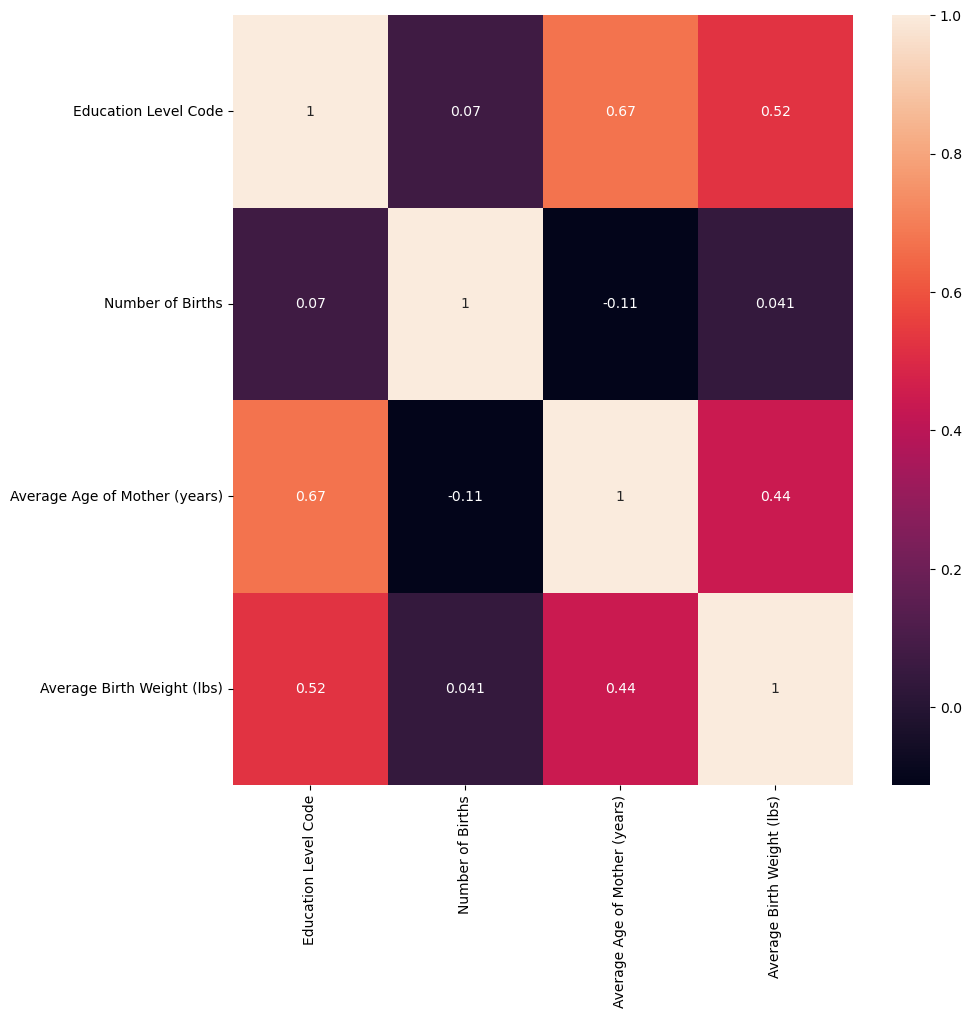

In [12]:
#creating colored heat map using seaborn
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) 

Overall, none of the variables above have a very strong correlation. The strongest correlation, was 0.67 indicating a strong correlation between average age of mother and education level. To me this makes sense, as the more education onw has, generally the longer that would take making the mother's age older. There was also another, whcih is only moderately strong, is 0.52 between the Education level of the mother and the average bith weight of the baby. Implying that there is possibly some relationship betweeen the two, i.e., the higher the education level, the heavier the baby 9 which is obviously not a causational relationship). 

### Creating scatterplot

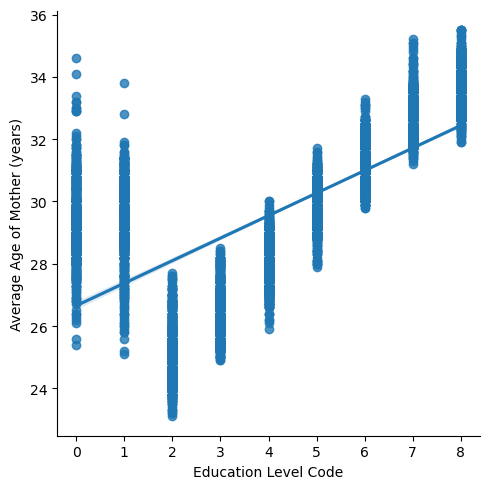

In [15]:
#create scatterplot for the 'mother's age' and 'education level'
sns.lmplot(x = 'Education Level Code', y = 'Average Age of Mother (years)', data = df_sub)

Since the education level code is technically categorical in nature, we see an interesting scatterplot. However, we can still infer things from this. In general, after 0 and 1, (0 - unknown, and 1 - 8th grade or lower) as the education level rises, the average age of the mother also rises whcih is why we say a stronger, positive correlation. 

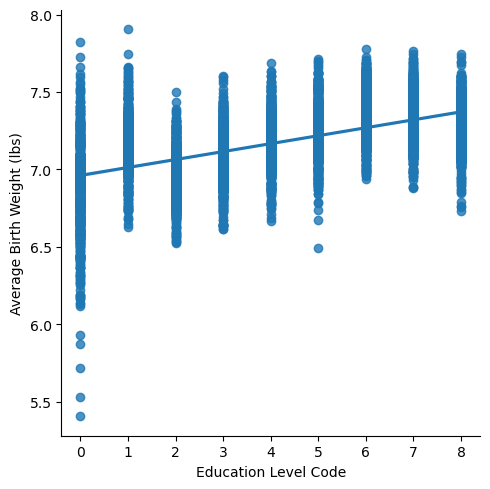

In [16]:
#create scatterplot for the 'birth weight' and 'education level'
sns.lmplot(x = 'Education Level Code', y = 'Average Birth Weight (lbs)', data = df_sub)

Negating the first column ( unknown edu level) we can actually see a little trend in this data when combined with the connections above that the less education, indicating the younger the mother, the lighter in weight of the babee, that is until the last two columns where the birth weight seems to decline a tab. This could be due to older ages of mothers having complications in child birth. 

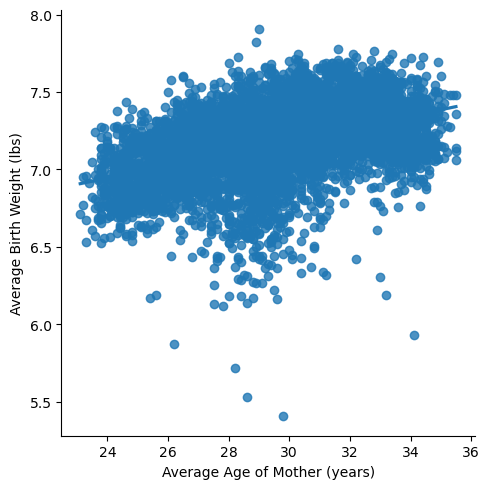

In [17]:
#create scatterplot for the 'average age of mother' and 'education level'
sns.lmplot(x = 'Average Age of Mother (years)', y = 'Average Birth Weight (lbs)', data = df_sub)

From this scatter plot, even though there was only a moderate correlation of 0.44, we can see a trend that the younger the mother, the lower the birthweight of the baby. 

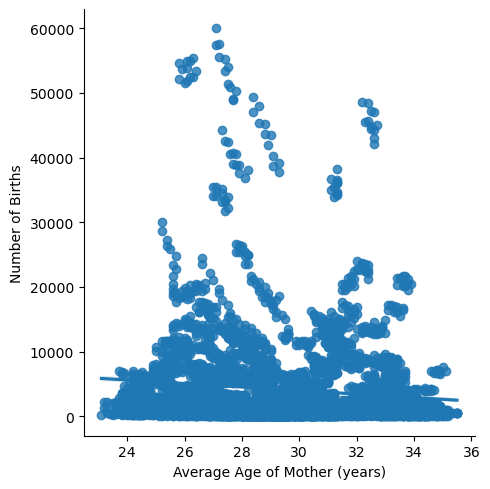

In [18]:
#create scatterplot for the 'avg age of mother' and 'number of births'
sns.lmplot(x = 'Average Age of Mother (years)', y = 'Number of Births', data = df_sub)

As expected, we do not see any relationship between the average age of the mother and the number of births there were that year. 

### pair plot

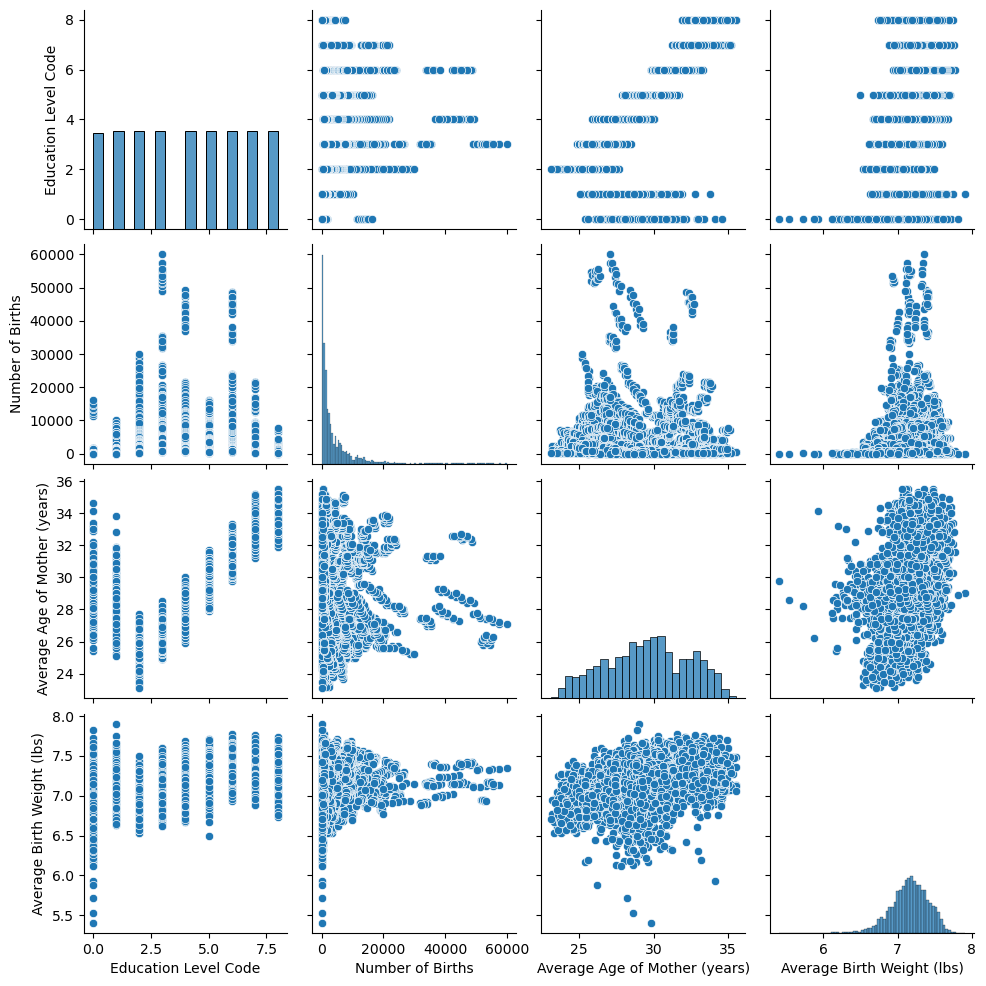

In [19]:
# Create a pair plot 

g = sns.pairplot(df_sub)

I see in general, similar findings to what I saw in my previous scatter plots, with the addition of the bar charts diagonally down the middle. I see that the average birth weight is about 7.2 lbs and the average age of mothers is about 31. 

### Categorical Chart

<Axes: xlabel='Average Age of Mother (years)', ylabel='Count'>

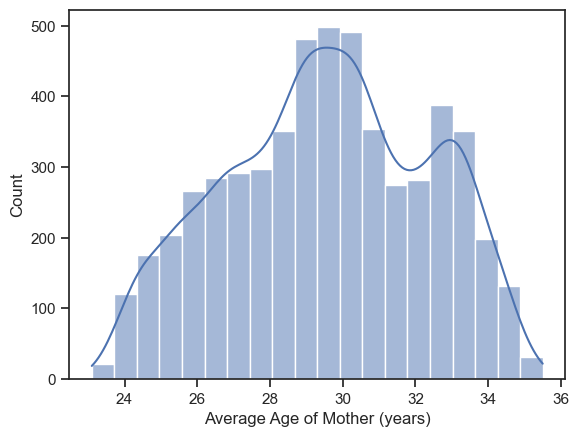

In [21]:
#histogram for ages to see trends for re-grouping
sns.histplot(df['Average Age of Mother (years)'], bins = 20, kde = True)

In [22]:
#creating age brackets 
df_sub.loc[df_sub['Average Age of Mother (years)'] < 26, 'Age Group'] = 'Young'

C:\Users\tlayt\AppData\Local\Temp\ipykernel_43636\2668775404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['Average Age of Mother (years)'] < 26, 'Age Group'] = 'Young'


In [24]:
df_sub.loc[(df_sub['Average Age of Mother (years)'] >= 26) & (df_sub['Average Age of Mother (years)'] <= 31), 'Age Group'] = 'Average'

In [25]:
df_sub.loc[df_sub['Average Age of Mother (years)'] > 31, 'Age Group'] = 'Old'

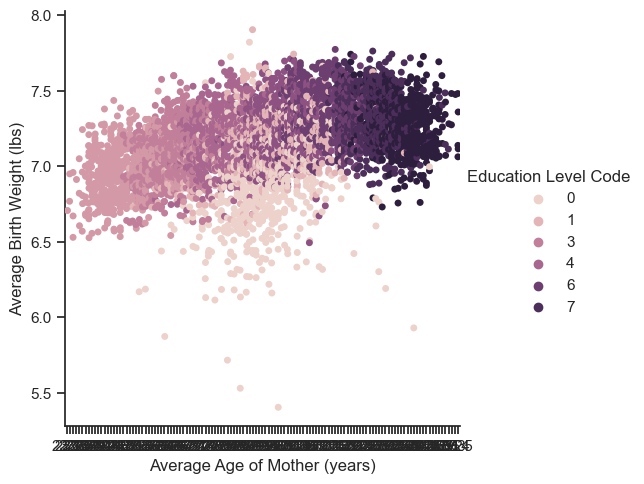

In [20]:
# Create a categorical plot in seaborn using the edu level categories 

sns.set(style="ticks")
g = sns.catplot(x="Average Age of Mother (years)", y="Average Birth Weight (lbs)", hue="Education Level Code", data=df_sub)

The younger the mother, the lower the edu level and the lower the birth weight. The converse is also true. 

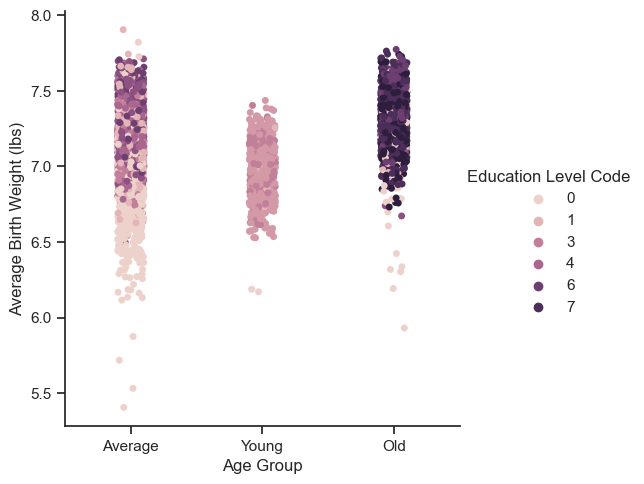

In [26]:
# Create a categorical plot in seaborn using the edu level and age grouping categories 

sns.set(style="ticks")
g = sns.catplot(x="Age Group", y="Average Birth Weight (lbs)", hue="Education Level Code", data=df_sub)

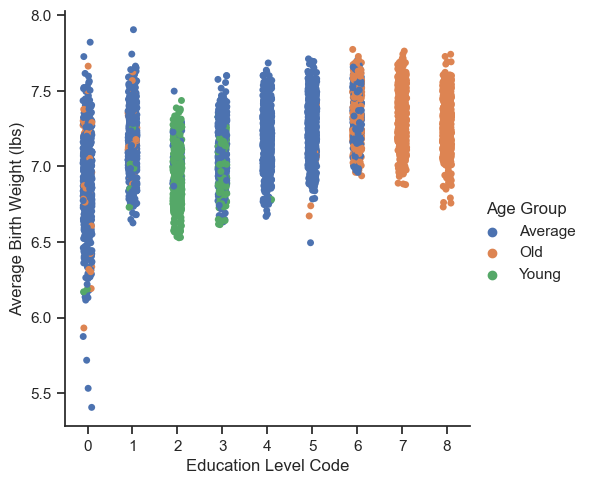

In [27]:
# Create a categorical plot in seaborn using age categories 

sns.set(style="ticks")
g = sns.catplot(x="Education Level Code", y="Average Birth Weight (lbs)", hue="Age Group", data=df_sub)

The more education, the older the mother, the lower the birth weight. Age has something to do with birth weight. Optimal birthweight is the middle age group.